In [1]:
# In this notebook we are performing EDA. 
# Before running this notebook make sure you have the dataset extracted and is under the same parent folder. 
# After running this notebook we are ablt to find the top 20 authors who have sent the most numbers of emails and for our project we are only 
# foucsing on these 20 authors.

In [ ]:
#importing libraries

import os
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 1. converting or data from files to a list of [Author_name, no of mail sent, SentEmail Folder, Sent Folder]
# 2. Now convering our python list to a Pandas Dataframe 

Authors = os.listdir("./maildir")
data_list =[]
AuthorFolderNum = len(Authors)


for each_author in Authors:
    try:
        EmailSentNum = len(os.listdir("./maildir/" + each_author + "/_sent_mail"))
        data_list.append([each_author, EmailSentNum, 1, 0])
    except FileNotFoundError as e:
        try:
            EmailSentNum = len(os.listdir("./maildir/" + each_author + "/sent"))
            data_list.append([each_author, EmailSentNum, 0, 1])
        except FileNotFoundError as e:
            pass
    except NotADirectoryError as e:
        pass
        
df = pd.DataFrame(data_list, columns=["AuthorName", "NumberEmailsSent", "SentEmailFolder", "SentFolder"])
AuthorNum = df.shape[0]
df

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
0,allen-p,602,1,0
1,arnold-j,814,1,0
2,arora-h,9,0,1
3,badeer-r,52,1,0
4,bass-e,1409,1,0
...,...,...,...,...
97,whalley-g,24,1,0
98,whalley-l,219,1,0
99,white-s,12,0,1
100,ybarbo-p,13,0,1


In [23]:
print("Numeric Information of Dataset")
print("Total number of Authors: {}".format(AuthorFolderNum))
print("No of authors who use _sent_email Folder: {}".format(len(df.loc[df["SentEmailFolder"]==1]))) 
print("Number of authors who use sent Folder: {}".format(len(df.loc[df["SentFolder"]==1])))

Numeric Information of Dataset
Total number of Authors: 150
No of authors who use _sent_email Folder: 78
Number of authors who use sent Folder: 24


In [15]:
#sorting our data based on the number of emails sent per author 

df = df.sort_values(by="NumberEmailsSent", ascending=False)
df
print(df)

       AuthorName  NumberEmailsSent  SentEmailFolder  SentFolder
56         mann-k              4220                1           0
14     dasovich-j              3930                0           1
41        jones-t              3810                0           1
80   shackleton-s              3774                0           1
42     kaminski-v              3464                1           0
..            ...               ...              ...         ...
68      pimenov-v                 5                1           0
62      merriss-s                 3                1           0
45         king-j                 3                1           0
35        heard-m                 2                0           1
101      zipper-a                 2                0           1

[102 rows x 4 columns]


In [16]:
#getting the top 20 rows out of all

df[:20]

,AuthorName,NumberEmailsSent,SentEmailFolder,SentFolder
56,mann-k,4220,1,0
14,dasovich-j,3930,0,1
41,jones-t,3810,0,1
80,shackleton-s,3774,0,1
42,kaminski-v,3464,1,0
49,lenhart-m,1992,0,1
91,taylor-m,1862,0,1
67,perlingiere-d,1770,0,1
28,germany-c,1659,1,0
77,sanders-r,1632,0,1


In [18]:
#getting the names of top 20 authors

df["AuthorName"][:20]

56           mann-k
14       dasovich-j
41          jones-t
80     shackleton-s
42       kaminski-v
49        lenhart-m
91         taylor-m
67    perlingiere-d
28        germany-c
77        sanders-r
65          nemec-g
4            bass-e
87        stclair-c
90          symes-k
43           kean-s
25         fossum-d
5            beck-s
76          sager-e
81       shankman-j
79          scott-s
Name: AuthorName, dtype: object

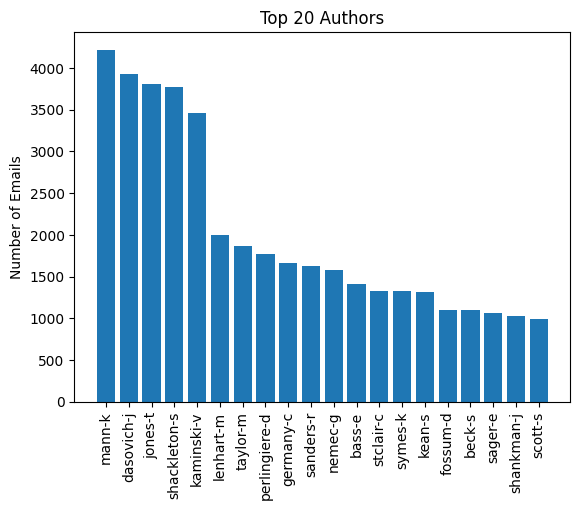

In [20]:
#plotting the graph of top 20 authors and their correspoing email sent value

plt.bar(df["AuthorName"][:20], df["NumberEmailsSent"][:20])
plt.ylabel("Number of Emails")
plt.xticks(df["AuthorName"][:20], rotation="vertical")
plt.title("Top 20 Authors")
plt.show()

In [21]:
#here our Step 1 is completed